In [34]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import torch
import torch.utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from simion_files.TOF_ML.src.simulations.nn_v2 import SIMdataset, NN, test_model

# Load model
model_path = "//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//model_v2.pth"
model = NN()
model.load_state_dict(torch.load(model_path, weights_only=True))

# Load test data
try:
    test_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//test_data_v2.pth", weights_only=True)
    test_data = test_dict['data']
    test_label = test_dict['labels']
    test_SIMdataset = SIMdataset(test_data, test_label)
    print(f'Loaded test_data_v2.pth: test data has length {len(test_data)}')
    batch_size_test = 256
    num_cores = 1 #multiprocessing.cpu_count()
    test_loader = torch.utils.data.DataLoader(test_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got test loader.')
except Exception as e:
    print(e)

# Test model
test_output = test_model(model, test_loader) # Each element in output_list is 1 batch.

Loaded test_data_v2.pth: test data has length 4383
Got test loader.


In [35]:
test_output = torch.flatten(test_output, start_dim=0)
print(test_output.shape, test_output.max())
print(test_label.shape, test_label.max())


torch.Size([4383]) tensor(0.3004)
torch.Size([4383]) tensor(1.0368)


Output tensor has shapetorch.Size([4383])


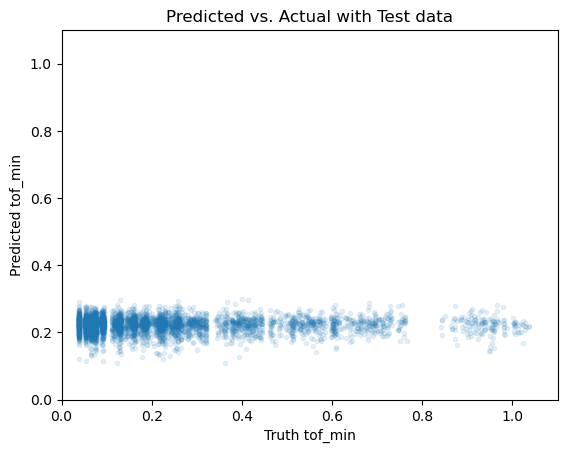

In [37]:
print(f'Output tensor has shape{test_output.shape}')
plt.scatter(test_label, test_output, marker='.', alpha=0.1)
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.xlabel('Truth tof_min')
plt.ylabel('Predicted tof_min')
plt.title('Predicted vs. Actual with Test data')
plt.show()

In [38]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import torch
import torch.utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from simion_files.TOF_ML.src.simulations.nn_v2 import SIMdataset, NN, test_model

# Load model
model_path = "//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//model_v2.pth"
model = NN()
model.load_state_dict(torch.load(model_path, weights_only=True))

# Load train data
try:
    train_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//train_data_v2.pth", weights_only=True)
    train_data = train_dict['data']
    train_label = train_dict['labels']
    train_SIMdataset = SIMdataset(train_data, train_label)
    print(f'Loaded train_data_v2.pth: train data has length {len(train_data)}')
    batch_size_test = 256
    num_cores = 1 #multiprocessing.cpu_count()
    train_loader = torch.utils.data.DataLoader(train_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got train loader.')
except Exception as e:
    print(e)
train_output = test_model(model, train_loader)

print(f'Output tensor has shape{train_output.shape}')

Loaded train_data_v2.pth: train data has length 13149
Got train loader.
Output tensor has shapetorch.Size([13149, 1])


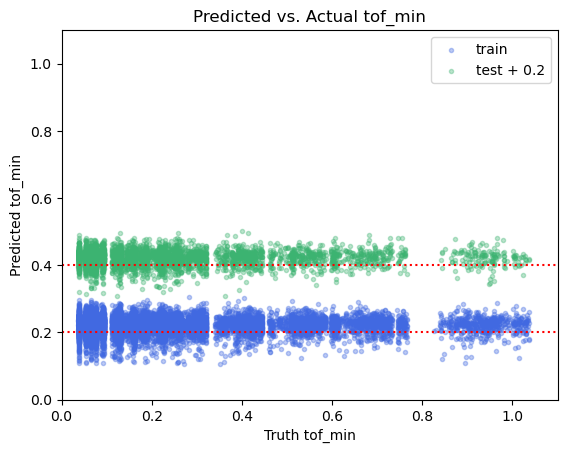

In [39]:
plt.scatter(train_label, train_output, alpha=0.35, marker='.', color='royalblue', label='train')
plt.scatter(test_label, test_output+0.2, alpha=0.35, marker='.', color='mediumseagreen', label='test + 0.2')
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.axhline(y=0.2, color='r', linestyle=':')
plt.axhline(y=0.4, color='r', linestyle=':')
plt.xlabel('Truth tof_min')
plt.ylabel('Predicted tof_min')
plt.title('Predicted vs. Actual tof_min')
plt.legend()
plt.show()

V3

In [51]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import torch
import torch.utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from simion_files.TOF_ML.src.simulations.nn_v3 import SIMdataset, NN, test_model

# Load model
modelv3_path = "//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//model_v3.pth"
modelv3 = NN()
modelv3.load_state_dict(torch.load(modelv3_path, weights_only=True))

# Load test data
try:
    testv3_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//test_data_v3.pth", weights_only=True)
    testv3_data = testv3_dict['data']
    testv3_label = testv3_dict['labels']
    testv3_SIMdataset = SIMdataset(testv3_data, testv3_label)
    print(f'Loaded test_data_v3.pth: test data has length {len(testv3_data)}')
    batch_size_test = 128
    num_cores = 1 #multiprocessing.cpu_count()
    testv3_loader = torch.utils.data.DataLoader(testv3_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got test loader.')
except Exception as e:
    print(e)

# Test model
testv3_output = test_model(modelv3, testv3_loader) # Each element in output_list is 1 batch.

try:
    trainv3_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//train_data_v3.pth", weights_only=True)
    trainv3_data = trainv3_dict['data']
    trainv3_label = trainv3_dict['labels']
    trainv3_SIMdataset = SIMdataset(trainv3_data, trainv3_label)
    print(f'Loaded train_data_v3.pth: train data has length {len(trainv3_data)}')
    batch_size_test = 128
    num_cores = 1 #multiprocessing.cpu_count()
    trainv3_loader = torch.utils.data.DataLoader(trainv3_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got train loader.')
except Exception as e:
    print(e)
trainv3_output = test_model(model, trainv3_loader)

print(f'Output tensor has shape{trainv3_output.shape}')

Loaded test_data_v3.pth: test data has length 4383
Got test loader.


Loaded train_data_v3.pth: train data has length 13149
Got train loader.
Output tensor has shapetorch.Size([13149, 1])


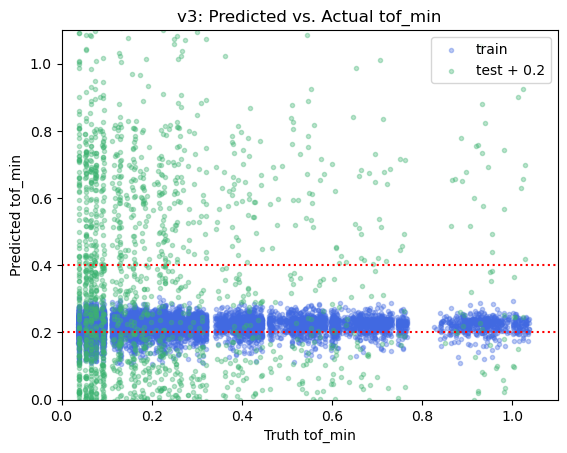

In [52]:
plt.scatter(trainv3_label, trainv3_output, alpha=0.35, marker='.', color='royalblue', label='train')
plt.scatter(testv3_label, testv3_output+0.2, alpha=0.35, marker='.', color='mediumseagreen', label='test + 0.2')
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.axhline(y=0.2, color='r', linestyle=':')
plt.axhline(y=0.4, color='r', linestyle=':')
plt.xlabel('Truth tof_min')
plt.ylabel('Predicted tof_min')
plt.title('v3: Predicted vs. Actual tof_min')
plt.legend()
plt.show()

V4

In [45]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import torch
import torch.utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from simion_files.TOF_ML.src.simulations.nn_v3 import SIMdataset, NN, test_model

# Load model
modelv4_path = "//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//model_v4.pth"
modelv4 = NN()
modelv4.load_state_dict(torch.load(modelv4_path, weights_only=True))

# Load test data
try:
    testv4_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//test_data_v4.pth", weights_only=True)
    testv4_data = testv4_dict['data']
    testv4_label = testv4_dict['labels']
    testv4_SIMdataset = SIMdataset(testv4_data, testv4_label)
    print(f'Loaded test_data_v4.pth: test data has length {len(testv4_data)}')
    batch_size_test = 100
    num_cores = 1 #multiprocessing.cpu_count()
    testv4_loader = torch.utils.data.DataLoader(testv3_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got test loader.')
except Exception as e:
    print(e)

# Test model
testv4_output = test_model(modelv4, testv4_loader) # Each element in output_list is 1 batch.

try:
    trainv4_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//train_data_v4.pth", weights_only=True)
    trainv4_data = trainv4_dict['data']
    trainv4_label = trainv4_dict['labels']
    trainv4_SIMdataset = SIMdataset(trainv4_data, trainv4_label)
    print(f'Loaded train_data_v4.pth: train data has length {len(trainv4_data)}')
    num_cores = 1 #multiprocessing.cpu_count()
    trainv4_loader = torch.utils.data.DataLoader(trainv4_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got train loader.')
except Exception as e:
    print(e)
trainv4_output = test_model(model, trainv4_loader)

print(f'Output tensor has shape{trainv4_output.shape}')

Loaded test_data_v4.pth: test data has length 4383
Got test loader.
Loaded train_data_v4.pth: train data has length 13149
Got train loader.
Output tensor has shapetorch.Size([13149, 1])


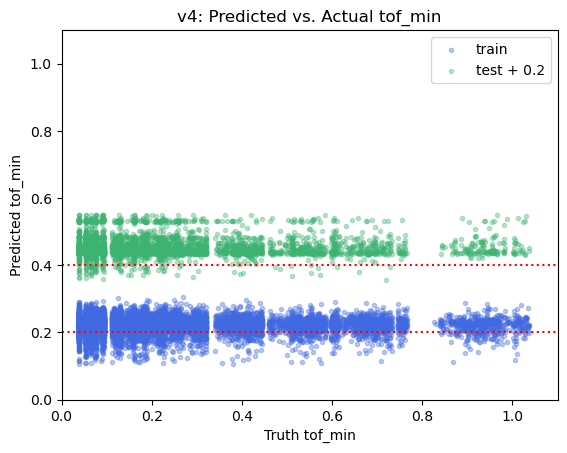

In [46]:
plt.scatter(trainv4_label, trainv4_output, alpha=0.35, marker='.', color='royalblue', label='train')
plt.scatter(testv4_label, testv4_output+0.2, alpha=0.35, marker='.', color='mediumseagreen', label='test + 0.2')
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.axhline(y=0.2, color='r', linestyle=':')
plt.axhline(y=0.4, color='r', linestyle=':')
plt.xlabel('Truth tof_min')
plt.ylabel('Predicted tof_min')
plt.title('v4: Predicted vs. Actual tof_min')
plt.legend()
plt.show()

Loaded test_data_v2_2.pth: test data has length 4383
Got test loader.
Loaded train_data_v2_2.pth: train data has length 13149
Got train loader.
Output tensor has shapetorch.Size([13149, 1])


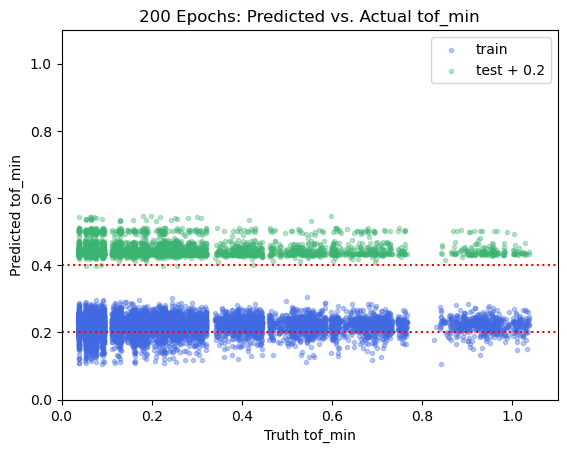

In [55]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import torch
import torch.utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from simion_files.TOF_ML.src.simulations.nn_v2 import SIMdataset, NN, test_model

# Load model
modelv2_2_path = "//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//model_v2_epoch200.pth"
modelv2_2 = NN()
modelv2_2.load_state_dict(torch.load(modelv2_2_path, weights_only=True))

# Load test data
try:
    testv2_2_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//test_data_v2.pth", weights_only=True)
    testv2_2_data = testv2_2_dict['data']
    testv2_2_label = testv2_2_dict['labels']
    testv2_2_SIMdataset = SIMdataset(testv2_2_data, testv2_2_label)
    print(f'Loaded test_data_v2_2.pth: test data has length {len(testv2_2_data)}')
    batch_size_test = 100
    num_cores = 1 #multiprocessing.cpu_count()
    testv2_2_loader = torch.utils.data.DataLoader(testv2_2_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got test loader.')
except Exception as e:
    print(e)

# Test model
testv2_2_output = test_model(modelv2_2, testv2_2_loader) # Each element in output_list is 1 batch.

try:
    trainv2_2_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//train_data_v2.pth", weights_only=True)
    trainv2_2_data = trainv2_2_dict['data']
    trainv2_2_label = trainv2_2_dict['labels']
    trainv2_2_SIMdataset = SIMdataset(trainv2_2_data, trainv2_2_label)
    print(f'Loaded train_data_v2_2.pth: train data has length {len(trainv2_2_data)}')
    num_cores = 1 #multiprocessing.cpu_count()
    trainv2_2_loader = torch.utils.data.DataLoader(trainv4_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got train loader.')
except Exception as e:
    print(e)
trainv2_2_output = test_model(model, trainv2_2_loader)

print(f'Output tensor has shape{trainv2_2_output.shape}')

plt.scatter(trainv2_2_label, trainv2_2_output, alpha=0.35, marker='.', color='royalblue', label='train')
plt.scatter(testv2_2_label, testv2_2_output+0.2, alpha=0.35, marker='.', color='mediumseagreen', label='test + 0.2')
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.axhline(y=0.2, color='r', linestyle=':')
plt.axhline(y=0.4, color='r', linestyle=':')
plt.xlabel('Truth tof_min')
plt.ylabel('Predicted tof_min')
plt.title('200 Epochs: Predicted vs. Actual tof_min')
plt.legend()
plt.show()

Got test loader.


Got train loader.
Output tensor has shapetorch.Size([13149, 1])


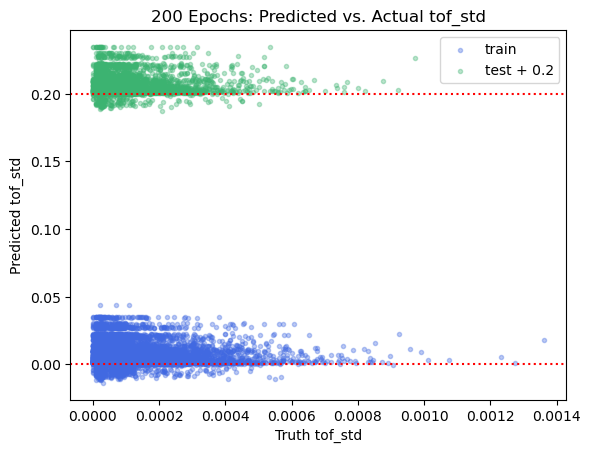

In [62]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import torch
import torch.utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from simion_files.TOF_ML.src.simulations.nn_v2 import SIMdataset, NN, test_model

# Load model
modelstd_path = "//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//model_v2_tofstd.pth"
modelstd = NN()
modelstd.load_state_dict(torch.load(modelstd_path, weights_only=True))

# Load test data
try:
    teststd_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//test_tofstd_v2.pth", weights_only=True)
    teststd_data = teststd_dict['data']
    teststd_label = teststd_dict['labels']
    teststd_SIMdataset = SIMdataset(teststd_data, teststd_label)
    #print(f'Loaded test_data_v2_2.pth: test data has length {len(testv2_2_data)}')
    batch_size_test = 100
    num_cores = 1 #multiprocessing.cpu_count()
    teststd_loader = torch.utils.data.DataLoader(teststd_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got test loader.')
except Exception as e:
    print(e)

# Test model
teststd_output = test_model(modelstd, teststd_loader) # Each element in output_list is 1 batch.

try:
    trainstd_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//train_tofstd_v2.pth", weights_only=True)
    trainstd_data = trainstd_dict['data']
    trainstd_label = trainstd_dict['labels']
    trainstd_SIMdataset = SIMdataset(trainstd_data, trainstd_label)
    #print(f'Loaded train_data_v2_2.pth: train data has length {len(trainv2_2_data)}')
    num_cores = 1 #multiprocessing.cpu_count()
    trainstd_loader = torch.utils.data.DataLoader(trainstd_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got train loader.')
except Exception as e:
    print(e)
trainstd_output = test_model(modelstd, trainstd_loader)

print(f'Output tensor has shape{trainstd_output.shape}')

plt.scatter(trainstd_label, trainstd_output, alpha=0.35, marker='.', color='royalblue', label='train')
plt.scatter(teststd_label, teststd_output+0.2, alpha=0.35, marker='.', color='mediumseagreen', label='test + 0.2')
# plt.xlim(0,0.4)
# plt.ylim(0,0.4)
plt.axhline(y=0.2, color='r', linestyle=':')
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Truth tof_std')
plt.ylabel('Predicted tof_std')
plt.title('200 Epochs: Predicted vs. Actual tof_std')
plt.legend()
plt.show()

In [64]:
#predicted std vs. true tof
summary_df = pd.read_pickle('/home/jovyan/simion_files/TOF_ML/src/simulations/summary_df_v1')
summary_df.describe()

,initial_ke,mid1_ratio,mid2_ratio,retardation,tof_min,tof_std
count,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000
mean,67.127995,0.346529,0.414810,-7.716176,0.232762,0.000095
std,84.309146,0.283056,0.295445,12.582545,0.223995,0.000109
min,0.300000,0.000000,0.000000,-80.000000,0.037310,0.000000
25%,10.300000,0.112480,0.135400,-10.000000,0.073706,0.000024
50%,28.000000,0.300000,0.400000,-4.000000,0.154684,0.000061
75%,95.000000,0.600000,0.700000,-1.000000,0.297535,0.000118
max,380.000000,1.000000,1.000000,15.000000,1.037290,0.001361


In [124]:
# loss as a function of epochs for default learning rate
train_loss_lr1e4 = pd.read_pickle("/home/jovyan/simion_files/TOF_ML/src/simulations/train_loss_tofstd_lr1e4")
train_loss_lr1e4['loss'][2199]


1.6364920156775042e-05

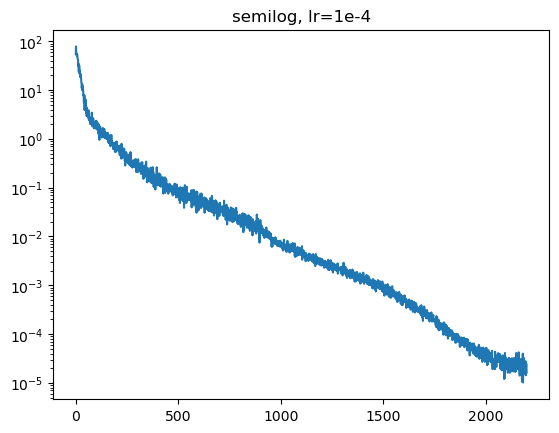

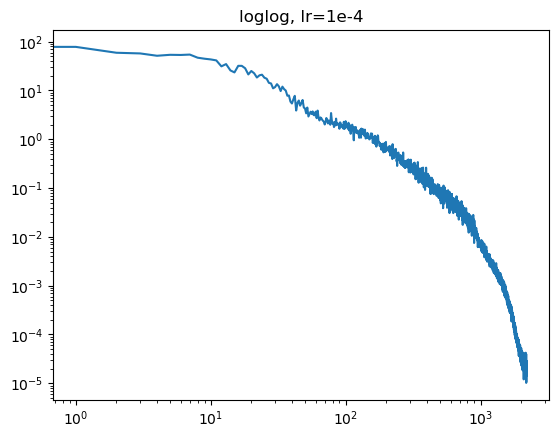

In [149]:
plt.semilogy(train_loss_lr1e4['loss'])
plt.title('semilog, lr=1e-4')
plt.show()
plt.loglog(train_loss_lr1e4['loss'])
plt.title('loglog, lr=1e-4')
plt.show()

Got test loader.
Got train loader.
Output tensor has shapetorch.Size([13149, 1])


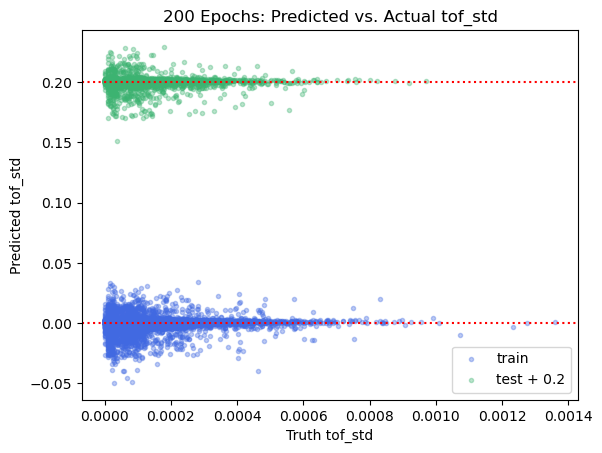

In [117]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import torch
import torch.utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from simion_files.TOF_ML.src.simulations.nn_v2 import SIMdataset, NN, test_model

# Load model
modelstd_path = "//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//model_tofstd_lr1e4.pth"
modelstd = NN()
modelstd.load_state_dict(torch.load(modelstd_path, weights_only=True))

# Load test data
try:
    teststd_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//test_tofstd_v2.pth", weights_only=True)
    teststd_data = teststd_dict['data']
    teststd_label = teststd_dict['labels']
    teststd_SIMdataset = SIMdataset(teststd_data, teststd_label)
    #print(f'Loaded test_data_v2_2.pth: test data has length {len(testv2_2_data)}')
    batch_size_test = 100
    num_cores = 1 #multiprocessing.cpu_count()
    teststd_loader = torch.utils.data.DataLoader(teststd_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got test loader.')
except Exception as e:
    print(e)

# Test model
teststd_output = test_model(modelstd, teststd_loader) # Each element in output_list is 1 batch.

try:
    trainstd_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//train_tofstd_v2.pth", weights_only=True)
    trainstd_data = trainstd_dict['data']
    trainstd_label = trainstd_dict['labels']
    trainstd_SIMdataset = SIMdataset(trainstd_data, trainstd_label)
    #print(f'Loaded train_data_v2_2.pth: train data has length {len(trainv2_2_data)}')
    num_cores = 1 #multiprocessing.cpu_count()
    trainstd_loader = torch.utils.data.DataLoader(trainstd_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got train loader.')
except Exception as e:
    print(e)
trainstd_output = test_model(modelstd, trainstd_loader)

print(f'Output tensor has shape{trainstd_output.shape}')

plt.scatter(trainstd_label, trainstd_output, alpha=0.35, marker='.', color='royalblue', label='train')
plt.scatter(teststd_label, teststd_output+0.2, alpha=0.35, marker='.', color='mediumseagreen', label='test + 0.2')
# plt.xlim(0,0.4)
# plt.ylim(0,0.4)
plt.axhline(y=0.2, color='r', linestyle=':')
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Truth tof_std')
plt.ylabel('Predicted tof_std')
plt.title('200 Epochs lr1e-4: Predicted vs. Actual tof_std')
plt.legend()
plt.show()

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import torch
import torch.utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from simion_files.TOF_ML.src.simulations.nn_v2 import SIMdataset, NN, test_model

# Load model
modelmin_path = "//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//model_tofmin_lr1e3.pth"
modelmin = NN()
modelmin.load_state_dict(torch.load(modelmin_path, weights_only=True))

summary_df = pd.read_pickle('/home/jovyan/simion_files/TOF_ML/src/simulations/summary_df_v1')
summary_df.describe()

try:
    trainmin_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//train_tofmin.pth", weights_only=True)
    trainmin_data = trainmin_dict['data']
    trainmin_label = trainmin_dict['labels']
    trainmin_SIMdataset = SIMdataset(trainmin_data, trainmin_label)
    num_cores = 1 #multiprocessing.cpu_count()
    trainmin_loader = torch.utils.data.DataLoader(trainmin_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
    print(f'Got train loader.')
except Exception as e:
    print(e)
trainmin_output = test_model(modelmin, trainmin_loader)

print(f'Output tensor has shape{trainmin_output.shape}')

plt.scatter(trainmin_label, trainmin_output, alpha=0.35, marker='.', color='royalblue', label='train')
#plt.scatter(teststd_label, teststd_output+0.2, alpha=0.35, marker='.', color='mediumseagreen', label='test + 0.2')
plt.xlim(0,1.1)
#plt.ylim(0,1.1)
#plt.axhline(y=0.2, color='r', linestyle=':')
#plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Truth tof_min')
plt.ylabel('Predicted tof_min')
plt.title('Predicted vs. Actual tof_min, lr=1e-3, epochs=50')
plt.legend()
plt.show()

RuntimeError: Error(s) in loading state_dict for NN:
	Missing key(s) in state_dict: "linear3.weight", "linear3.bias". 
	size mismatch for linear2.weight: copying a param with shape torch.Size([1, 20]) from checkpoint, the shape in current model is torch.Size([40, 20]).
	size mismatch for linear2.bias: copying a param with shape torch.Size([1]) from checkpoint, the shape in current model is torch.Size([40]).

In [120]:
actual = np.array(trainstd_label)
predicted =  np.array(trainstd_output)
diff_squared = np.power((actual - predicted), int(2))
np.sqrt(np.mean(diff_squared))

Text(0.5, 1.0, 'tof_min loss on loglog, lr=1e-3, epoch=50')

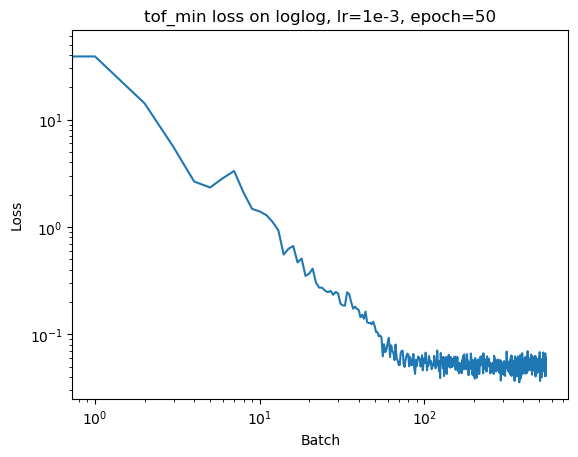

In [260]:
# After saving train and test data as files then loading them back as variables.
# on train data
train_loss_tofmin_lr1e3 = pd.read_pickle("/home/jovyan/simion_files/TOF_ML/src/simulations/train_loss_tofmin_lr1e3")
plt.loglog(train_loss_tofmin_lr1e3['loss'])
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('tof_min loss on loglog, lr=1e-3, epoch=50')

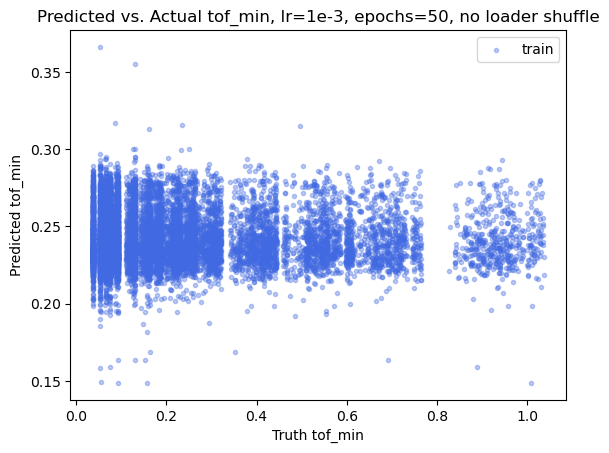

Text(0.5, 1.0, ' tof_min loss on loglog, lr=1e-3, epochs=50, no loader shuffle')

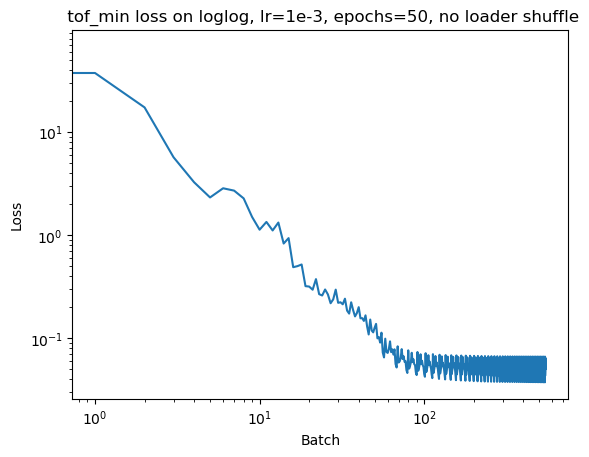

In [281]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import torch
import torch.utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from simion_files.TOF_ML.src.simulations.nn_v2 import SIMdataset, NN, test_model

# Load model
modelmin_noLoaderShuffle_path = "//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//model_tofmin_lr1e3_noLoaderShuffle.pth"
model_noLoaderShuffle = NN()
model_noLoaderShuffle.load_state_dict(torch.load(modelmin_noLoaderShuffle_path, weights_only=True))

try:
    train_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//train_tofmin.pth", weights_only=True)
    train_data = train_dict['data']
    train_label = train_dict['labels']
    train_SIMdataset = SIMdataset(train_data, train_label)
#     #print(f'Loaded train_data_v2_2.pth: train data has length {len(trainv2_2_data)}')
    num_cores = 1 #multiprocessing.cpu_count()
    train_loader = torch.utils.data.DataLoader(train_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
#     print(f'Got train loader.')
except Exception as e:
    print(e)
trainmin_noLoaderShuffle_output = test_model(model_noLoaderShuffle, train_loader)

# print(f'Output tensor has shape{trainstd_output.shape}')

plt.scatter(train_label, trainmin_noLoaderShuffle_output, alpha=0.35, marker='.', color='royalblue', label='train')
# plt.scatter(teststd_label, teststd_output+0.2, alpha=0.35, marker='.', color='mediumseagreen', label='test + 0.2')
# # plt.xlim(0,0.4)
# # plt.ylim(0,0.4)
# plt.axhline(y=0.2, color='r', linestyle=':')
# plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Truth tof_min')
plt.ylabel('Predicted tof_min')
plt.title('Predicted vs. Actual tof_min, lr=1e-3, epochs=50, no loader shuffle')
plt.legend()
plt.show()

# Plot loss
train_loss_tofmin_lr1e3_noLoaderShuffle = pd.read_pickle("/home/jovyan/simion_files/TOF_ML/src/simulations/train_loss_tofmin_lr1e3_noLoaderShuffle")
plt.loglog(train_loss_tofmin_lr1e3_noLoaderShuffle['loss'])
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title(' tof_min loss on loglog, lr=1e-3, epochs=50, no loader shuffle')

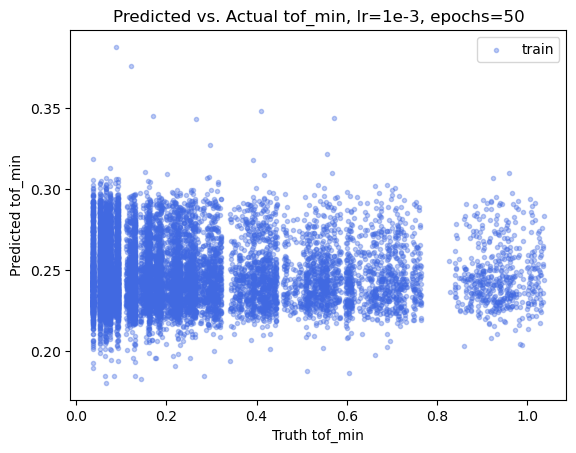

Text(0.5, 1.0, ' tof_min loss on loglog, lr=1e-3, epochs=50')

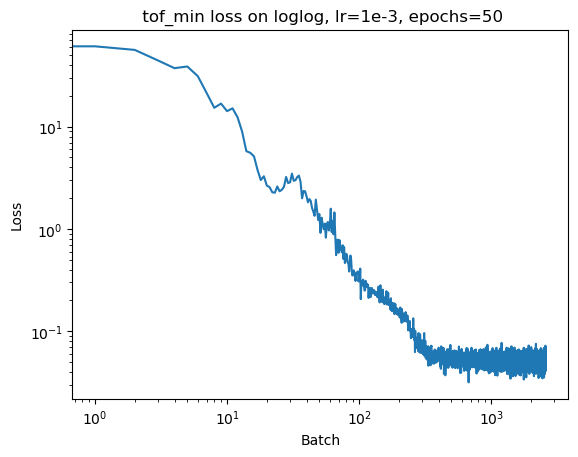

In [292]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import torch
import torch.utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from simion_files.TOF_ML.src.simulations.nn_v2 import SIMdataset, NN, test_model

# Load model
modelmin0_path = "//home//jovyan//simion_files//TOF_ML//src//simulations//modelresults//model_v2_epoch50.pth"
modelmin0 = NN()
modelmin0.load_state_dict(torch.load(modelmin0_path, weights_only=True))

try:
    train0_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//train_data_v2.pth", weights_only=True)
    train0_data = train0_dict['data']
    train0_label = train0_dict['labels']
    train0_SIMdataset = SIMdataset(train0_data, train0_label)
#     #print(f'Loaded train_data_v2_2.pth: train data has length {len(trainv2_2_data)}')
    num_cores = 1 #multiprocessing.cpu_count()
    train0_loader = torch.utils.data.DataLoader(train_SIMdataset, shuffle=True, batch_size=batch_size_test, num_workers=num_cores)
#     print(f'Got train loader.')
except Exception as e:
    print(e)
trainmin0_output = test_model(modelmin0, train0_loader)

# print(f'Output tensor has shape{trainstd_output.shape}')

plt.scatter(train0_label, trainmin0_output, alpha=0.35, marker='.', color='royalblue', label='train')
# plt.scatter(teststd_label, teststd_output+0.2, alpha=0.35, marker='.', color='mediumseagreen', label='test + 0.2')
# # plt.xlim(0,0.4)
# # plt.ylim(0,0.4)
# plt.axhline(y=0.2, color='r', linestyle=':')
# plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Truth tof_min')
plt.ylabel('Predicted tof_min')
plt.title('Predicted vs. Actual tof_min, lr=1e-3, epochs=50')
plt.legend()
plt.show()

# Plot loss
train_loss_tofmin_lr1e3 = pd.read_pickle("/home/jovyan/simion_files/TOF_ML/src/simulations/train_loss_tofmin_lr1e3")
plt.loglog(train_loss_tofmin_lr1e3['loss'])
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title(' tof_min loss on loglog, lr=1e-3, epochs=50')

Text(0.5, 1.0, ' tof_min loss on loglog, lr=1e-3, epochs=50')

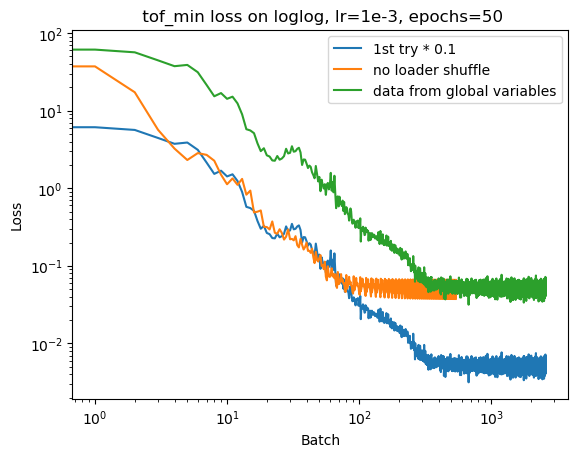

In [278]:
train_loss_tofmin_lr1e3_v0= pd.read_pickle("/home/jovyan/simion_files/TOF_ML/src/simulations/train_loss_tofmin_lr1e3")
plt.loglog(train_loss_tofmin_lr1e3_v0['loss']*0.10, label='1st try * 0.1')
train_loss_tofmin_lr1e3_noLoaderShuffle = pd.read_pickle("/home/jovyan/simion_files/TOF_ML/src/simulations/train_loss_tofmin_lr1e3_noLoaderShuffle")
plt.loglog(train_loss_tofmin_lr1e3_noLoaderShuffle['loss'], label='no loader shuffle')
train_loss_tofmin_lr1e3 = pd.read_pickle("/home/jovyan/simion_files/TOF_ML/src/simulations/train_loss_tofmin_lr1e3")
plt.loglog(train_loss_tofmin_lr1e3['loss'], label='data from global variables')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.title(' tof_min loss on loglog, lr=1e-3, epochs=50')

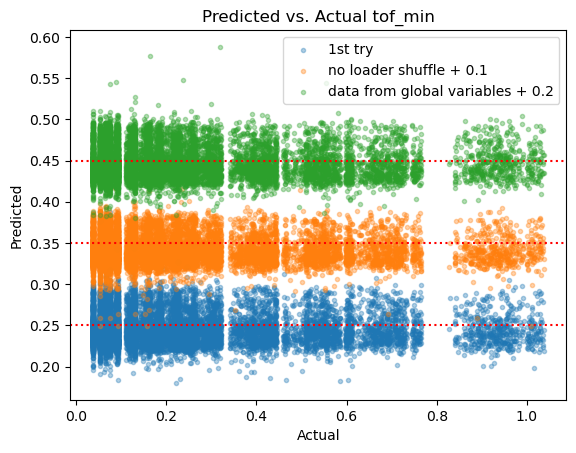

In [286]:
plt.scatter(train0_label, trainmin0_output, alpha=0.35, marker='.', label='1st try')
plt.scatter(train_label, trainmin_noLoaderShuffle_output+0.1, alpha=0.35, marker='.', label='no loader shuffle + 0.1')
plt.scatter(trainmin_label, trainmin_output+0.2, alpha=0.35, marker='.', label='data from global variables + 0.2')
plt.legend()
plt.title('Predicted vs. Actual tof_min')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.axhline(y=0.25, color='r', linestyle=':')
plt.axhline(y=0.35, color='r', linestyle=':')
plt.axhline(y=0.45, color='r', linestyle=':')
plt.show()


Output tensor has shapetorch.Size([17532, 1])


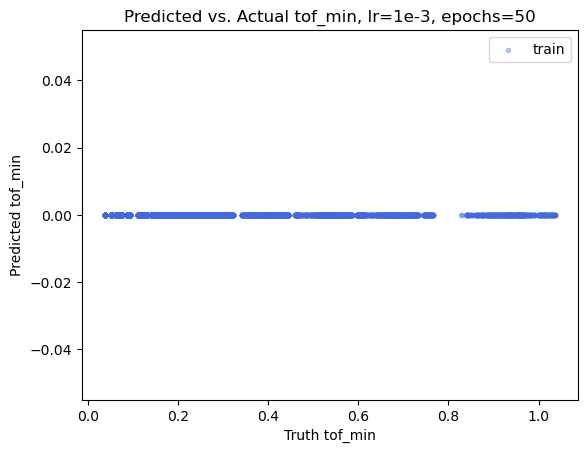

In [1]:
# Plot predicted from subset of summary df

import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import torch
import torch.utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from simion_files.TOF_ML.src.simulations.nn_v2 import SIMdataset, NN, test_model
import importlib
importlib.reload(SIMdataset, NN, test_model)


# Load model
modelmin0_path = "/home/jovyan/simion_files/TOF_ML/src/simulations/modelresults/model_v2_epoch50_alldata.pth"
modelmin0 = NN()
modelmin0.load_state_dict(torch.load(modelmin0_path, weights_only=True))

summary_df_path = "//home//jovyan//simion_files//TOF_ML//src//simulations//summary_df_v1"
summary_df = pd.read_pickle(summary_df_path)
scaled_ke = np.array(summary_df['initial_ke']/400).copy()
scaled_ret = np.array(summary_df['retardation']/100).copy()
summary_df['scaled_ke']=scaled_ke
summary_df['scaled_ret']= scaled_ret

try:
    train0_label = torch.tensor(np.array(summary_df['tof_min'][0::]), dtype=torch.float)
    train0_data_all = torch.tensor(np.array(summary_df[['scaled_ke','mid1_ratio','mid2_ratio','scaled_ret']]), dtype=torch.float)
    train0_data = train0_data_all[:,:]
    # train0_dict = torch.load("//home//jovyan//simion_files//TOF_ML//src//simulations//train_data_v2.pth", weights_only=True)
    # train0_data = train0_dict['data']
    # train0_label = train0_dict['labels']
    train0_SIMdataset = SIMdataset(train0_data, train0_label)
    #print(f'Loaded train_data_v2_2.pth: train data has length {len(trainv2_2_data)}')
    num_cores = 1 #multiprocessing.cpu_count()
    batch_size = 256
    train0_loader = torch.utils.data.DataLoader(train0_SIMdataset, shuffle=True, batch_size=batch_size, num_workers=num_cores)
    #print(f'Got train loader.')
except Exception as e:
    print(e)
trainmin0_output = test_model(modelmin0, train0_loader)
print(f'Output tensor has shape{trainmin0_output.shape}')

plt.scatter(train0_label, trainmin0_output, alpha=0.35, marker='.', color='royalblue', label='train')
# plt.scatter(teststd_label, teststd_output+0.2, alpha=0.35, marker='.', color='mediumseagreen', label='test + 0.2')
#plt.xlim(0,0.4)
#plt.ylim(0,0.4)
# plt.axhline(y=0.2, color='r', linestyle=':')
# plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Truth tof_min')
plt.ylabel('Predicted tof_min')
plt.title('Predicted vs. Actual tof_min, lr=1e-3, epochs=50')
plt.legend()
plt.show()

# Plot loss
train_loss_tofmin_lr1e3 = pd.read_pickle("/home/jovyan/simion_files/TOF_ML/src/simulations/train_loss_tofmin_lr1e3")
# plt.loglog(train_loss_tofmin_lr1e3['loss'])
# plt.xlabel('Batch')
# plt.ylabel('Loss')
# plt.title(' tof_min loss on loglog, lr=1e-3, epochs=50')

In [8]:
summary_df.describe()


,initial_ke,mid1_ratio,mid2_ratio,retardation,tof_min,tof_std
count,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000
mean,67.127995,0.346529,0.414810,-7.716176,0.232762,0.000095
std,84.309146,0.283056,0.295445,12.582545,0.223995,0.000109
min,0.300000,0.000000,0.000000,-80.000000,0.037310,0.000000
25%,10.300000,0.112480,0.135400,-10.000000,0.073706,0.000024
50%,28.000000,0.300000,0.400000,-4.000000,0.154684,0.000061
75%,95.000000,0.600000,0.700000,-1.000000,0.297535,0.000118
max,380.000000,1.000000,1.000000,15.000000,1.037290,0.001361


In [6]:
scaled_ke = np.array(summary_df['initial_ke']/400).copy()
scaled_ret = np.array(summary_df['retardation']/100).copy()
mid1 = np.array(summary_df['mid1_ratio'])
mid2 = np.array(summary_df['mid2_ratio'])

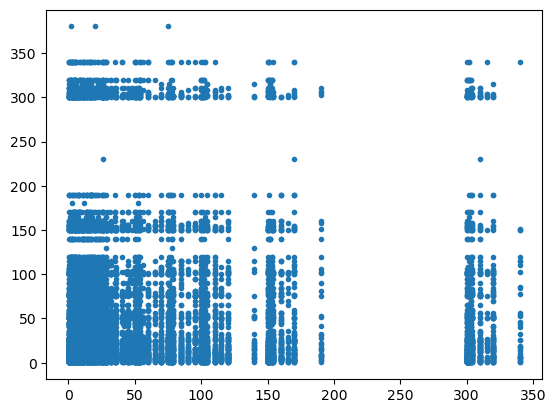

In [237]:
plt.scatter(summary_df['initial_ke'][0:13149], trainstd_data[:,0], marker='.')

(-85.0, 20.0)

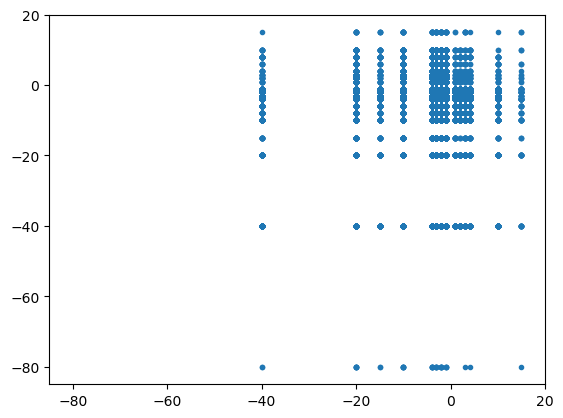

In [251]:
plt.scatter(summary_df['retardation'][0:13149], trainstd_data[:,3], marker='.')
plt.xlim(-85, 20)
plt.ylim(-85, 20)

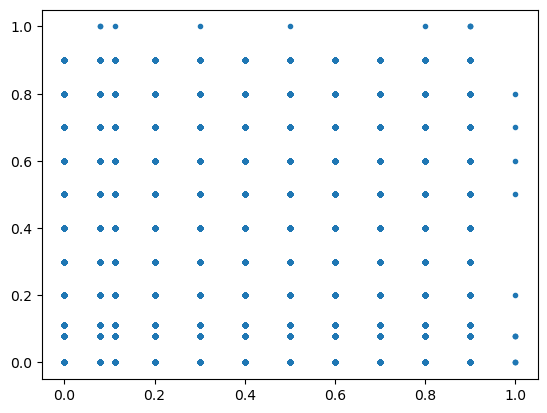

In [244]:
plt.scatter(summary_df['mid1_ratio'][0:13149], trainstd_data[:,1], marker='.')

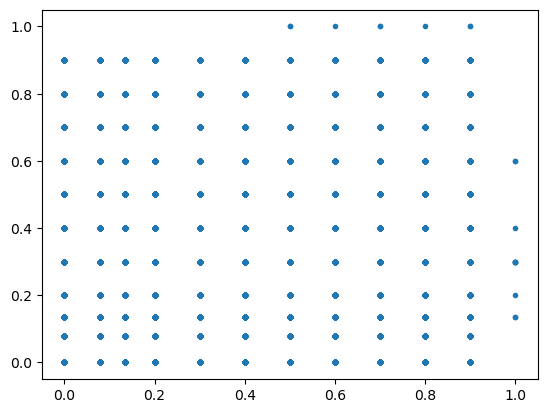

In [249]:
plt.scatter(summary_df['mid2_ratio'][0:13149], trainstd_data[:,2], marker='.')

In [314]:
summary_df.describe()

,initial_ke,mid1_ratio,mid2_ratio,retardation,tof_min,tof_std
count,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000
mean,67.127995,0.346529,0.414810,-7.716176,0.232762,0.000095
std,84.309146,0.283056,0.295445,12.582545,0.223995,0.000109
min,0.300000,0.000000,0.000000,-80.000000,0.037310,0.000000
25%,10.300000,0.112480,0.135400,-10.000000,0.073706,0.000024
50%,28.000000,0.300000,0.400000,-4.000000,0.154684,0.000061
75%,95.000000,0.600000,0.700000,-1.000000,0.297535,0.000118
max,380.000000,1.000000,1.000000,15.000000,1.037290,0.001361


In [331]:
train_dict = torch.load('/home/jovyan/simion_files/TOF_ML/src/simulations/train_tofmin.pth', weights_only=True)
X_train = train_dict['data']
label_train = train_dict['labels']

In [362]:
X_train_arr = X_train.detach().numpy()
label_train_arr = label_train.detach().numpy()
zeros = np.zeros(4383)
label_train_arr= np.append(label_train_arr, zeros)
len(label_train_arr)

17532

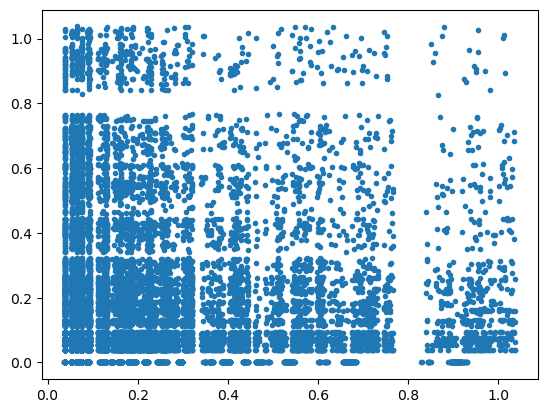

In [364]:
plt.scatter(summary_df['tof_min'], label_train_arr, marker='.')
plt.show()

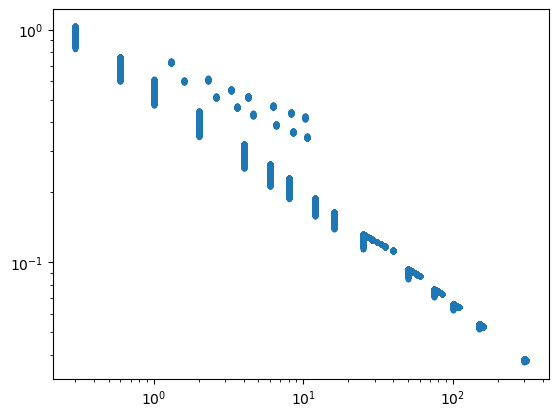

In [376]:
plt.loglog(summary_df['initial_ke']+summary_df['retardation'], summary_df['tof_min'], '.')